
## Get The City Weather Data

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import Citypy
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key




In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # print(city) or # print (i, city) 
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
     # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    #print(city_url)
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | shu
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | buala
Processing Record 8 of Set 1 | marcona
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | ubatuba
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | ust-maya
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | mehamn
Processing Record 19 of Set 1 | kloulklubed
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | rungata
City not found. Skipping...
Processing Record 38 of Set 4 | khandbari
Processing Record 39 of Set 4 | havre-saint-pierre
Processing Record 40 of Set 4 | lagunas
Processing Record 41 of Set 4 | tanete
Processing Record 42 of Set 4 | ibotirama
Processing Record 43 of Set 4 | sorvag
City not found. Skipping...
Processing Record 44 of Set 4 | flinders
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | ayer itam
City not found. Skipping...
Processing Record 47 of Set 4 | acapulco
Processing Record 48 of Set 4 | nizhniy baskunchak
Processing Record 49 of Set 4 | sola
Processing Record 50 of Set 4 | quesnel
Processing Record 1 of Set 5 | aden
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | anbu
Processing Record 4 of Set 5 | westport
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | sioux lookout
Processing Record 7 of Set 5 | okhotsk
Processing Record 8

City not found. Skipping...
Processing Record 25 of Set 8 | ancud
Processing Record 26 of Set 8 | atbasar
Processing Record 27 of Set 8 | chernyshevskiy
Processing Record 28 of Set 8 | caravelas
Processing Record 29 of Set 8 | kruisfontein
Processing Record 30 of Set 8 | beloha
Processing Record 31 of Set 8 | srednekolymsk
Processing Record 32 of Set 8 | danielskuil
Processing Record 33 of Set 8 | tarko-sale
Processing Record 34 of Set 8 | mbaiki
Processing Record 35 of Set 8 | tiznit
Processing Record 36 of Set 8 | nemuro
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | tombouctou
Processing Record 39 of Set 8 | zaraza
Processing Record 40 of Set 8 | saint-philippe
Processing Record 41 of Set 8 | jalu
Processing Record 42 of Set 8 | ovsyanka
Processing Record 43 of Set 8 | dulce nombre de culmi
Processing Record 44 of Set 8 | okha
Processing Record 45 of Set 8 | awjilah
Processing Record 46 of Set 8 | qandala
Processing Record 47 of Set 8 | akdepe
Processing Rec

Processing Record 16 of Set 12 | trat
Processing Record 17 of Set 12 | sagua la grande
Processing Record 18 of Set 12 | bereda
Processing Record 19 of Set 12 | sao miguel do araguaia
Processing Record 20 of Set 12 | morgan city
Processing Record 21 of Set 12 | guerrero negro
Processing Record 22 of Set 12 | petrozavodsk
Processing Record 23 of Set 12 | la orilla
Processing Record 24 of Set 12 | rafraf
Processing Record 25 of Set 12 | zyryanovsk
Processing Record 26 of Set 12 | ginir
Processing Record 27 of Set 12 | lata
Processing Record 28 of Set 12 | belaya gora
Processing Record 29 of Set 12 | nantucket
Processing Record 30 of Set 12 | maceio
Processing Record 31 of Set 12 | qostanay
Processing Record 32 of Set 12 | khor
Processing Record 33 of Set 12 | oktyabrskiy
Processing Record 34 of Set 12 | la huacana
Processing Record 35 of Set 12 | pipri
Processing Record 36 of Set 12 | mangaratiba
Processing Record 37 of Set 12 | jiblah
Processing Record 38 of Set 12 | loudi
Processing Rec

In [7]:
len(city_data)

553

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # print(city) or # print (i, city) 
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
     # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    #print(city_url)
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          "Weather Description":city_weather_description })

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.67,64,99,12.44,PF,2022-07-25 18:09:57
1,Esperance,-33.8667,121.9000,51.66,62,0,16.13,AU,2022-07-25 18:06:58
2,Vaini,-21.2000,-175.2000,71.76,88,20,5.75,TO,2022-07-25 18:09:58
3,Klaksvik,62.2266,-6.5890,49.12,83,36,17.27,FO,2022-07-25 18:09:59
4,Shu,43.5983,73.7614,83.75,20,0,10.36,KZ,2022-07-25 18:09:59
5,Butaritari,3.0707,172.7902,82.08,71,97,20.40,KI,2022-07-25 18:09:59
6,Buala,-8.1450,159.5921,79.45,84,48,8.48,SB,2022-07-25 18:10:00
7,Albany,42.6001,-73.9662,85.57,71,99,5.01,US,2022-07-25 18:06:13
8,Mar Del Plata,-38.0023,-57.5575,55.09,92,100,14.97,AR,2022-07-25 18:10:01
9,Port Alfred,-33.5906,26.8910,52.18,84,0,13.94,ZA,2022-07-25 18:10:01


In [9]:
#reorder columns
new_column_order = [ "City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed",]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-07-25 18:09:57,-9.8000,-139.0333,77.67,64,99,12.44
1,Esperance,AU,2022-07-25 18:06:58,-33.8667,121.9000,51.66,62,0,16.13
2,Vaini,TO,2022-07-25 18:09:58,-21.2000,-175.2000,71.76,88,20,5.75
3,Klaksvik,FO,2022-07-25 18:09:59,62.2266,-6.5890,49.12,83,36,17.27
4,Shu,KZ,2022-07-25 18:09:59,43.5983,73.7614,83.75,20,0,10.36
5,Butaritari,KI,2022-07-25 18:09:59,3.0707,172.7902,82.08,71,97,20.40
6,Buala,SB,2022-07-25 18:10:00,-8.1450,159.5921,79.45,84,48,8.48
7,Albany,US,2022-07-25 18:06:13,42.6001,-73.9662,85.57,71,99,5.01
8,Mar Del Plata,AR,2022-07-25 18:10:01,-38.0023,-57.5575,55.09,92,100,14.97
9,Port Alfred,ZA,2022-07-25 18:10:01,-33.5906,26.8910,52.18,84,0,13.94


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
#city_data_df = pd.read_csv("weather_data/cities.csv")
#city_data_df.head()

## Get Data for Plotting

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

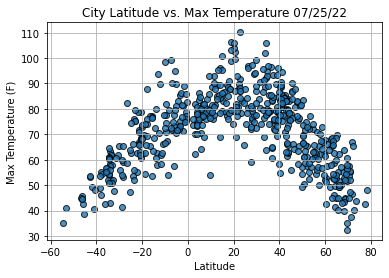

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

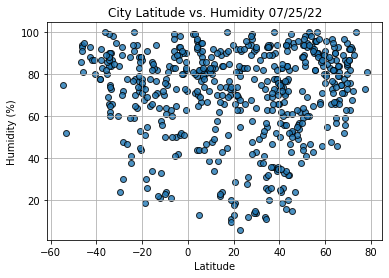

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

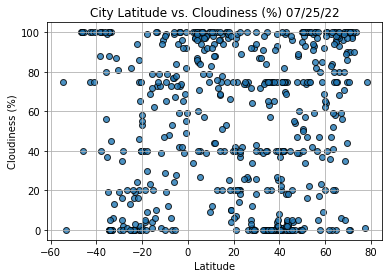

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

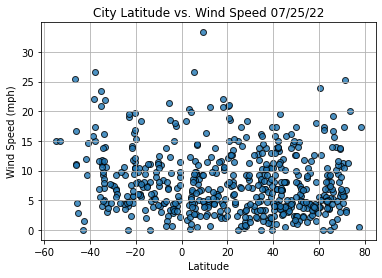

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Linear Regression

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Ust-Maya
Country                        RU
Date          2022-07-25 18:10:03
Lat                       60.4167
Lng                      134.5333
Max Temp                     52.7
Humidity                       80
Cloudiness                     64
Wind Speed                   3.85
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
548    False
549    False
550     True
551    False
552     True
Name: Lat, Length: 553, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Klaksvik,FO,2022-07-25 18:09:59,62.2266,-6.5890,49.12,83,36,17.27
4,Shu,KZ,2022-07-25 18:09:59,43.5983,73.7614,83.75,20,0,10.36
5,Butaritari,KI,2022-07-25 18:09:59,3.0707,172.7902,82.08,71,97,20.40
7,Albany,US,2022-07-25 18:06:13,42.6001,-73.9662,85.57,71,99,5.01
13,Ust-Maya,RU,2022-07-25 18:10:03,60.4167,134.5333,52.70,80,64,3.85


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

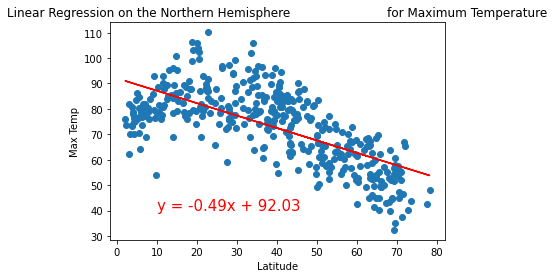

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

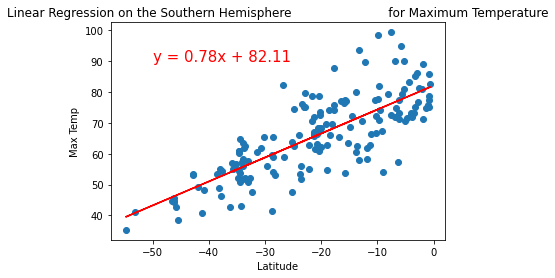

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

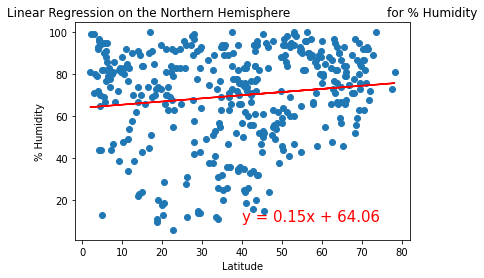

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

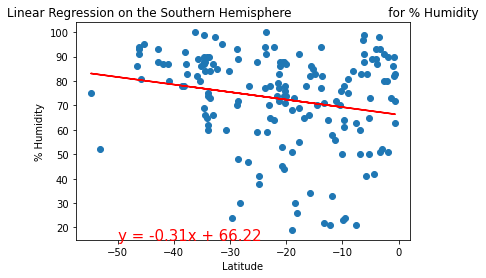

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

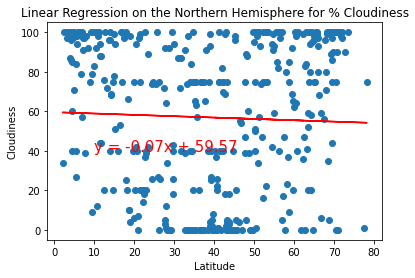

In [31]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness',(10,40))

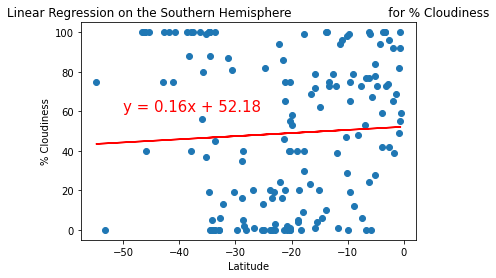

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

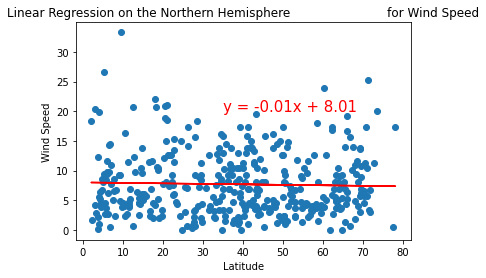

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(35,20))

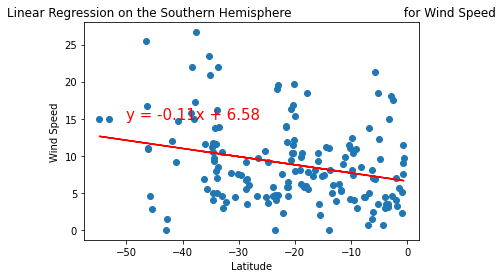

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))

In [44]:
#!pip install gmaps

  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=a02e5d50e327c85cf891d250290fbe72185e64f204f810b1222b1f83830f62ed
  Stored in directory: c:\users\floyd\appdata\local\pip\cache\wheels\66\ab\29\3032938612273665f0fa4d2fab4e3ecfe86480eaaa40aaee91
Successfully built gmaps


## Other Notes

In [ ]:
# Create a practice set of random latitude and longitude combinations.
#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)


In [ ]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])